# Training Models

In [1]:
import pandas as pd 
import os
import sys

sys.path.append(os.path.abspath('..'))

from app.model import vectorize_text, train_model, train_model_emotions, evaluate_model

import joblib
from sklearn.model_selection import train_test_split


 Training model: SVM
Best parameters for svm model: {'C': 0.1, 'dual': True, 'loss': 'squared_hinge'}
Best cross-validation score: 0.8777
Accuracy: 0.8734

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      2500
           1       0.86      0.89      0.88      2500

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



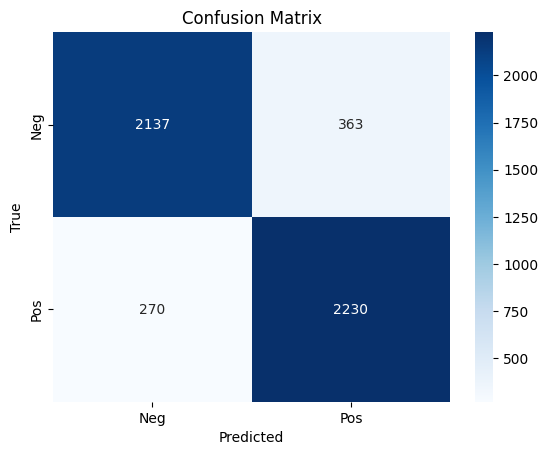


 Training model: RANDOM_FOREST
Best parameters for random_forest model: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.8402
Accuracy: 0.8412

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2500
           1       0.84      0.85      0.84      2500

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



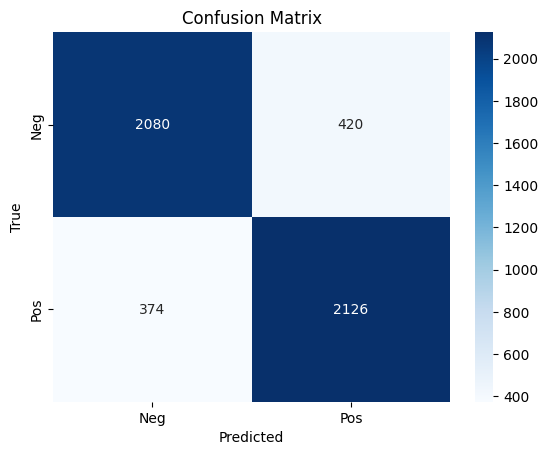


 Training model: XGBOOST
Best parameters for xgboost model: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
Best cross-validation score: 0.8217
Accuracy: 0.8192

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      2500
           1       0.79      0.86      0.83      2500

    accuracy                           0.82      5000
   macro avg       0.82      0.82      0.82      5000
weighted avg       0.82      0.82      0.82      5000



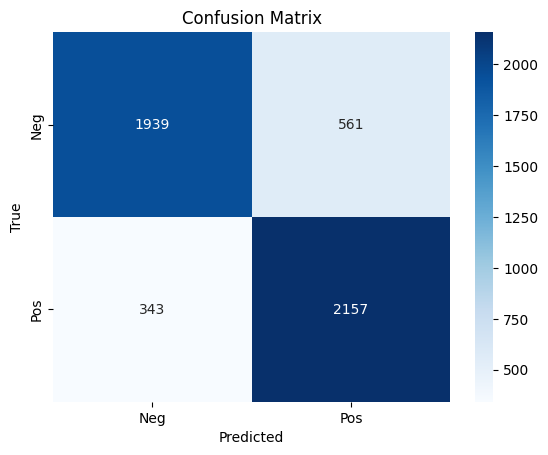


Best model: svm with accuracy: 0.8734


['../models/vectorizer.joblib']

In [ ]:
df = pd.read_csv('../data/preprocessed/imdb_reviews_train_clean.csv')


X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label'], test_size=0.2, stratify=df['label'], random_state=42
)

X_train_vect, X_test_vect, vectorizer = vectorize_text(X_train, X_test)

best_accuracy = 0.0
best_model = None
best_model_name = None


for model_name in ['svm', 'random_forest', 'xgboost']:
    print(f"\n Training model: {model_name.upper()}")
    model, best_parms = train_model(X_train_vect, y_train, model_type=model_name)
    acc = evaluate_model(model, X_test_vect, y_test)
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = model_name
        
print(f"\nBest model: {best_model_name} with accuracy: {best_accuracy:.4f}")
joblib.dump(best_model, '../models/best_model.joblib')
joblib.dump(vectorizer, '../models/vectorizer.joblib')


 Training model: LOGISTIC
Best parameters for logistic model: {'estimator__C': 0.1}
Best cross-validation score: 0.4401
Accuracy: 0.4440

Classification Report:
              precision    recall  f1-score   support

  admiration       0.54      0.44      0.49      3426
   amusement       0.63      0.67      0.65      1849
    approval       0.44      0.31      0.37      3524
      caring       0.29      0.34      0.31      1200
   curiosity       0.33      0.38      0.35      1939
      desire       0.30      0.42      0.35       763
  excitement       0.28      0.24      0.26      1126
   gratitude       0.71      0.70      0.71      2325
         joy       0.37      0.28      0.32      1597
        love       0.53      0.72      0.61      1638
    optimism       0.43      0.32      0.37      1743
       pride       0.09      0.23      0.13       260
      relief       0.10      0.25      0.14       258
    surprise       0.40      0.51      0.45      1103

    accuracy              

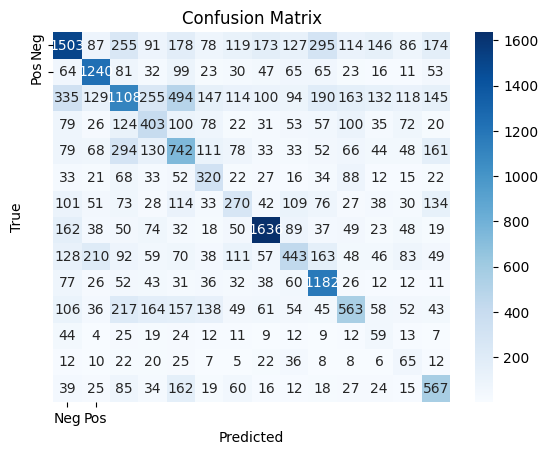


 Training model: NAIVE_BAYES
Best parameters for naive_bayes model: {'alpha': 1.0, 'fit_prior': False}
Best cross-validation score: 0.4053
Accuracy: 0.4081

Classification Report:
              precision    recall  f1-score   support

  admiration       0.47      0.43      0.45      3426
   amusement       0.52      0.61      0.56      1849
    approval       0.39      0.31      0.34      3524
      caring       0.28      0.38      0.32      1200
   curiosity       0.33      0.32      0.32      1939
      desire       0.29      0.31      0.30       763
  excitement       0.25      0.23      0.24      1126
   gratitude       0.64      0.64      0.64      2325
         joy       0.30      0.29      0.30      1597
        love       0.48      0.59      0.53      1638
    optimism       0.36      0.32      0.34      1743
       pride       0.13      0.12      0.12       260
      relief       0.13      0.11      0.12       258
    surprise       0.36      0.46      0.40      1103

    acc

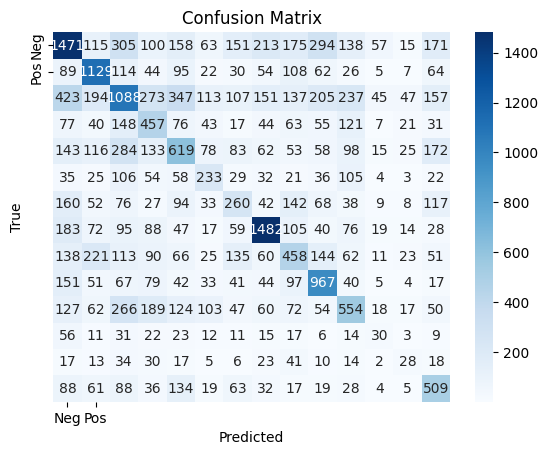


 Training model: SVM


: 

In [ ]:
df = pd.read_csv('../data/preprocessed/goemotions_train_positive_clean.csv')

X_train, X_test, y_train, y_test = train_test_split(
    df['text_clean'], df['emotion'], test_size=0.2, stratify=df['emotion'], random_state=42
)

X_train = X_train.fillna("")
X_test = X_test.fillna("")

X_train_vect, X_test_vect, vectorizer = vectorize_text(X_train, X_test)

best_accuracy = 0.0
best_model = None
best_model_name = None


for model_name in ['logistic', 'naive_bayes', 'svm', 'random_forest']:
    print(f"\n Training model: {model_name.upper()}")
    model, best_parms = train_model_emotions(X_train_vect, y_train, model_type=model_name)
    acc = evaluate_model(model, X_test_vect, y_test)
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = model_name
        
print(f"\nBest model: {best_model_name} with accuracy: {best_accuracy:.4f}")
joblib.dump(best_model, '../models/positive_model.joblib')
joblib.dump(vectorizer, '../models/vectorizer_positive.joblib')


 Training model: LOGISTIC
Accuracy: 0.3412

Classification Report:
                precision    recall  f1-score   support

         anger       0.39      0.31      0.34      1617
     annoyance       0.29      0.44      0.35      2724
disappointment       0.27      0.19      0.22      1694
   disapproval       0.30      0.42      0.35      2285
       disgust       0.40      0.22      0.28      1060
 embarrassment       0.51      0.18      0.27       495
          fear       0.50      0.44      0.47       639
         grief       0.31      0.07      0.12       135
   nervousness       0.43      0.12      0.19       362
   realization       0.36      0.37      0.36      1757
       remorse       0.49      0.44      0.46       505
       sadness       0.42      0.36      0.39      1351

      accuracy                           0.34     14624
     macro avg       0.39      0.30      0.32     14624
  weighted avg       0.36      0.34      0.34     14624



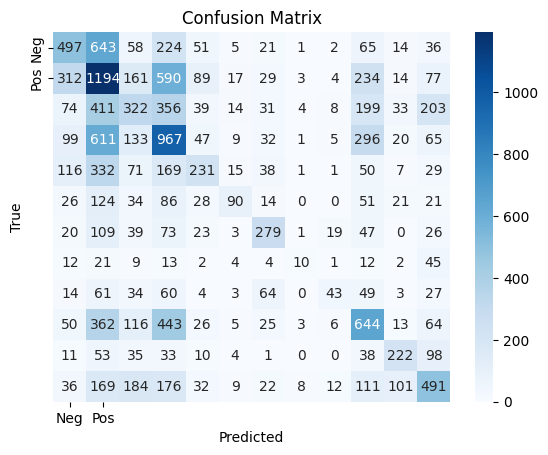


 Training model: NAIVE_BAYES
Accuracy: 0.2986

Classification Report:


c:\Users\polpu\OneDrive\Escritorio\GitHubRepos\sentiment-analyzer\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\polpu\OneDrive\Escritorio\GitHubRepos\sentiment-analyzer\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\polpu\OneDrive\Escritorio\GitHubRepos\sentiment-analyzer\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

                precision    recall  f1-score   support

         anger       0.41      0.22      0.29      1617
     annoyance       0.25      0.57      0.35      2724
disappointment       0.25      0.16      0.20      1694
   disapproval       0.28      0.39      0.32      2285
       disgust       0.46      0.13      0.20      1060
 embarrassment       0.59      0.04      0.08       495
          fear       0.59      0.22      0.32       639
         grief       0.00      0.00      0.00       135
   nervousness       0.40      0.02      0.04       362
   realization       0.34      0.28      0.31      1757
       remorse       0.51      0.12      0.20       505
       sadness       0.39      0.33      0.36      1351

      accuracy                           0.30     14624
     macro avg       0.37      0.21      0.22     14624
  weighted avg       0.35      0.30      0.28     14624



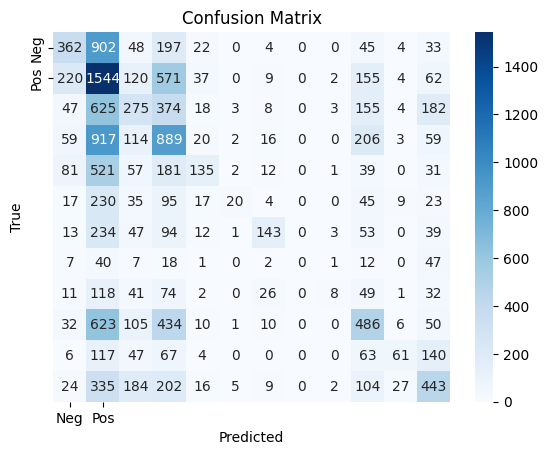


 Training model: SVM
Accuracy: 0.3255

Classification Report:
                precision    recall  f1-score   support

         anger       0.35      0.34      0.35      1617
     annoyance       0.29      0.34      0.31      2724
disappointment       0.25      0.18      0.21      1694
   disapproval       0.31      0.38      0.34      2285
       disgust       0.32      0.25      0.28      1060
 embarrassment       0.36      0.20      0.26       495
          fear       0.43      0.47      0.45       639
         grief       0.22      0.12      0.15       135
   nervousness       0.30      0.17      0.22       362
   realization       0.34      0.37      0.36      1757
       remorse       0.44      0.42      0.43       505
       sadness       0.37      0.36      0.36      1351

      accuracy                           0.33     14624
     macro avg       0.33      0.30      0.31     14624
  weighted avg       0.32      0.33      0.32     14624



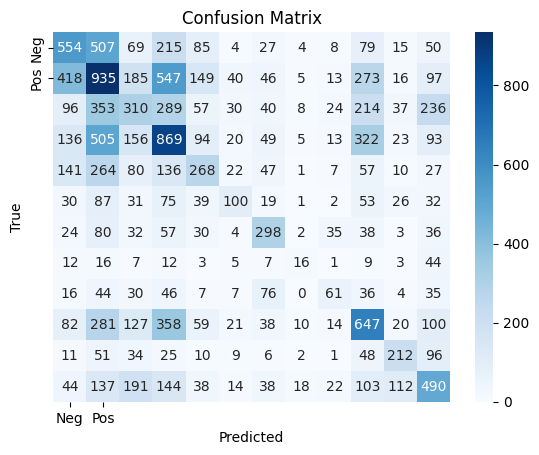


 Training model: RANDOM_FOREST
Accuracy: 0.1915

Classification Report:
                precision    recall  f1-score   support

         anger       0.38      0.01      0.01      1617
     annoyance       0.19      0.99      0.32      2724
disappointment       0.67      0.00      0.00      1694
   disapproval       0.41      0.02      0.03      2285
       disgust       0.00      0.00      0.00      1060
 embarrassment       0.00      0.00      0.00       495
          fear       0.00      0.00      0.00       639
         grief       0.00      0.00      0.00       135
   nervousness       0.00      0.00      0.00       362
   realization       0.67      0.00      0.00      1757
       remorse       1.00      0.00      0.00       505
       sadness       0.57      0.03      0.06      1351

      accuracy                           0.19     14624
     macro avg       0.32      0.09      0.04     14624
  weighted avg       0.39      0.19      0.07     14624



c:\Users\polpu\OneDrive\Escritorio\GitHubRepos\sentiment-analyzer\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\polpu\OneDrive\Escritorio\GitHubRepos\sentiment-analyzer\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\polpu\OneDrive\Escritorio\GitHubRepos\sentiment-analyzer\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

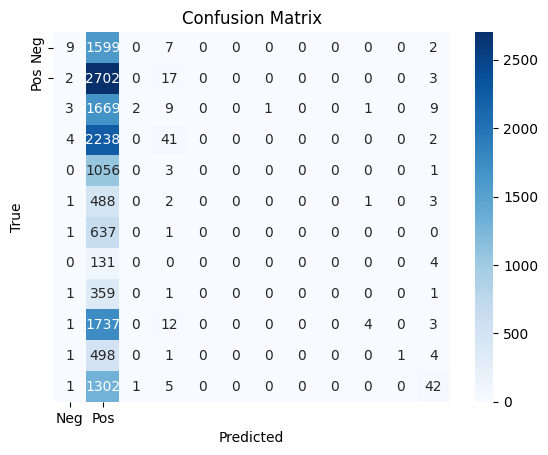


Best model: logistic with accuracy: 0.3412


['../models/vectorizer_negative.joblib']

In [9]:
df = pd.read_csv('../data/preprocessed/goemotions_train_negative_clean.csv')

X_train, X_test, y_train, y_test = train_test_split(
    df['text_clean'], df['emotion'], test_size=0.2, stratify=df['emotion'], random_state=42
)

X_train = X_train.fillna("")
X_test = X_test.fillna("")

X_train_vect, X_test_vect, vectorizer = vectorize_text(X_train, X_test)

best_accuracy = 0.0
best_model = None
best_model_name = None


for model_name in ['logistic', 'naive_bayes', 'svm', 'random_forest']:
    print(f"\n Training model: {model_name.upper()}")
    model = train_model_emotions(X_train_vect, y_train, model_type=model_name)
    acc = evaluate_model(model, X_test_vect, y_test)
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = model_name
        
print(f"\nBest model: {best_model_name} with accuracy: {best_accuracy:.4f}")
joblib.dump(best_model, '../models/negative_model.joblib')
joblib.dump(vectorizer, '../models/vectorizer_negative.joblib')